In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [3]:
df=pd.read_csv('ChurnData.csv')

In [4]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df['churn']=df['churn'].astype(int)

In [6]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,200.0,35.505000,21.640971,1.000,16.75000,33.500,55.2500,72.000
age,200.0,41.165000,13.076803,19.000,31.00000,40.000,51.0000,76.000
address,200.0,11.650000,10.158419,0.000,3.00000,9.000,18.0000,48.000
income,200.0,75.130000,128.430468,9.000,31.00000,48.000,80.0000,1668.000
ed,200.0,2.825000,1.285550,1.000,2.00000,3.000,4.0000,5.000
employ,200.0,10.225000,8.957430,0.000,3.00000,7.500,17.0000,44.000
equip,200.0,0.425000,0.495584,0.000,0.00000,0.000,1.0000,1.000
callcard,200.0,0.705000,0.457187,0.000,0.00000,1.000,1.0000,1.000
wireless,200.0,0.290000,0.454901,0.000,0.00000,0.000,1.0000,1.000
longmon,200.0,11.789250,9.887250,1.100,5.53750,8.250,14.3000,62.300


In [10]:
df.corr()['churn'].sort_values(ascending=False)

churn       1.000000
equip       0.275284
equipmon    0.255348
ebill       0.254838
internet    0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64

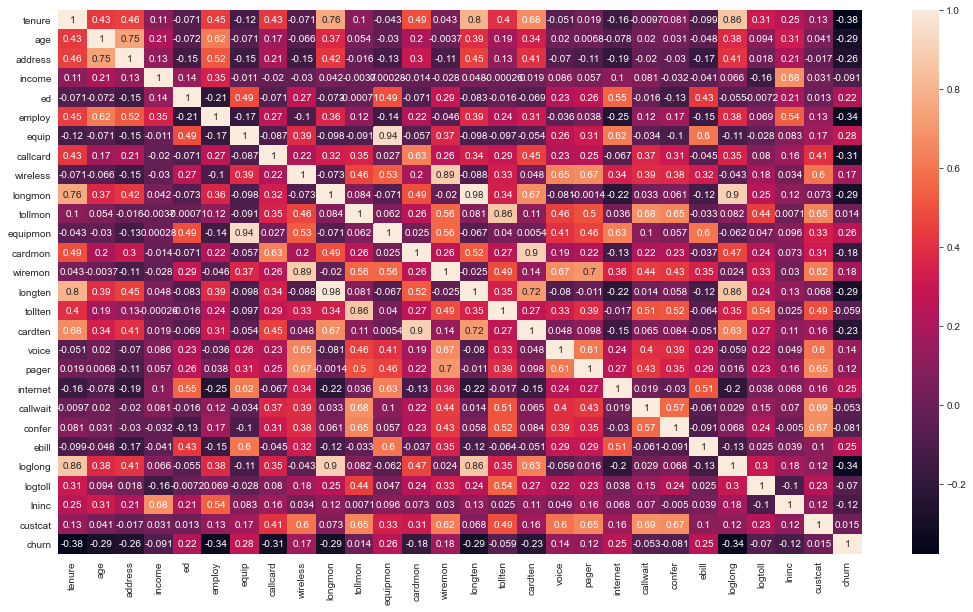

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 0, 'Age')

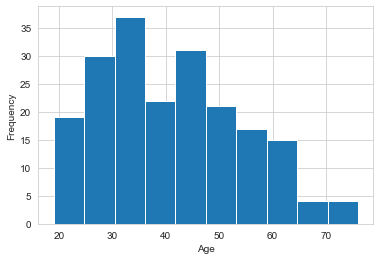

In [13]:
sns.set_style('whitegrid')
df['age'].plot(kind='hist')
plt.xlabel('Age')

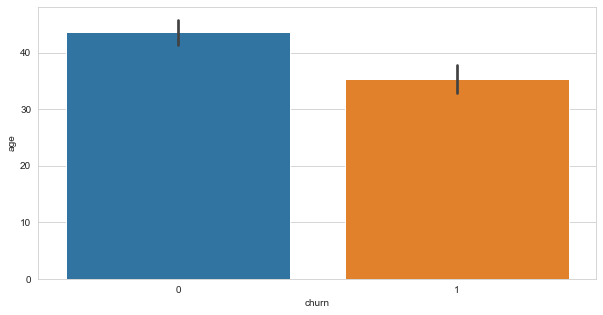

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(y='age',x='churn',data=df)

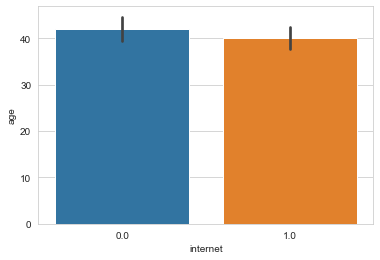

In [26]:
sns.barplot(y='age',x='internet',data=df)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
X=df.drop('churn',axis=1)
y=df['churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
log=LogisticRegression()

In [35]:
log.fit(X_train,y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predict=log.predict(X_test)

In [37]:
predict

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [40]:
df1=pd.DataFrame({'Actual Values':y_test,'Predicted Values':predict})
df1.head()

,Actual Values,Predicted Values
95,1,1
15,1,1
30,0,0
158,0,0
128,1,0


In [41]:
vcat=[]
for x in predict:
    if x==1:
        vcat.append('Yes')
    else:
        vcat.append('No')

df1['Churn Status']=vcat
df1.head(10)

,Actual Values,Predicted Values,Churn Status
95,1,1,Yes
15,1,1,Yes
30,0,0,No
158,0,0,No
128,1,0,No
115,1,1,Yes
69,0,0,No
170,0,1,Yes
174,1,0,No
45,0,0,No


<h2>Evaluation Metrics: </h2>

In [42]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        45
           1       0.43      0.40      0.41        15

    accuracy                           0.72        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.71      0.72      0.71        60



In [43]:
print(confusion_matrix(y_test,predict))

[[37  8]
 [ 9  6]]
